# KMeans Clustering을 활용하여 데이터 기반의 고객 segment 분류

# 1. 랜덤 데이터 생성해서 kmeans clustering

## 1. 모듈 로딩 및 랜덤 데이터 생성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs     # 데이터 생성

In [3]:
# 200개 샘플, 2개의 독립변수, 4개의 그룹으로 이루어진 데이터 생성

data = make_blobs(n_samples = 200, n_features = 2, centers = 4, random_state = 100)
data

(array([[-1.04541152e+01, -7.62125255e+00],
        [-1.00696483e+01, -6.35203699e+00],
        [-9.72925240e+00, -8.44434843e+00],
        [-9.53601173e+00, -8.04924975e+00],
        [-3.00736857e+00,  5.70163667e+00],
        [-1.00825197e+01, -7.06157008e+00],
        [ 1.48356884e+00,  6.54127044e+00],
        [ 1.36630977e+00,  7.30084118e+00],
        [-6.15050479e-01,  7.65521577e+00],
        [-2.13385599e-01,  7.84779827e+00],
        [ 3.36818459e-01, -3.40287961e+00],
        [-1.37722038e+00,  6.91773657e+00],
        [-1.08726796e+00,  5.80147972e+00],
        [-1.63584937e+00,  8.88579630e+00],
        [-7.62592530e-01,  7.32519908e+00],
        [-1.93336328e+00,  5.70953908e+00],
        [-9.51418426e+00, -7.24137223e+00],
        [-9.86650380e-01,  6.87917724e+00],
        [-9.37825374e+00, -7.94292047e+00],
        [ 2.66345400e-01,  7.40859703e+00],
        [-1.20385333e+01, -6.80941325e+00],
        [-9.20343837e+00, -8.85252239e+00],
        [ 4.10071850e-01, -3.997

In [4]:
data[0]     # 독립변수

array([[-1.04541152e+01, -7.62125255e+00],
       [-1.00696483e+01, -6.35203699e+00],
       [-9.72925240e+00, -8.44434843e+00],
       [-9.53601173e+00, -8.04924975e+00],
       [-3.00736857e+00,  5.70163667e+00],
       [-1.00825197e+01, -7.06157008e+00],
       [ 1.48356884e+00,  6.54127044e+00],
       [ 1.36630977e+00,  7.30084118e+00],
       [-6.15050479e-01,  7.65521577e+00],
       [-2.13385599e-01,  7.84779827e+00],
       [ 3.36818459e-01, -3.40287961e+00],
       [-1.37722038e+00,  6.91773657e+00],
       [-1.08726796e+00,  5.80147972e+00],
       [-1.63584937e+00,  8.88579630e+00],
       [-7.62592530e-01,  7.32519908e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-9.51418426e+00, -7.24137223e+00],
       [-9.86650380e-01,  6.87917724e+00],
       [-9.37825374e+00, -7.94292047e+00],
       [ 2.66345400e-01,  7.40859703e+00],
       [-1.20385333e+01, -6.80941325e+00],
       [-9.20343837e+00, -8.85252239e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [ 2.

In [5]:
data[1]     # 종속변수

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

In [6]:
# 독립변수의 첫번째 칼럼

data[0][:, 0]

array([-1.04541152e+01, -1.00696483e+01, -9.72925240e+00, -9.53601173e+00,
       -3.00736857e+00, -1.00825197e+01,  1.48356884e+00,  1.36630977e+00,
       -6.15050479e-01, -2.13385599e-01,  3.36818459e-01, -1.37722038e+00,
       -1.08726796e+00, -1.63584937e+00, -7.62592530e-01, -1.93336328e+00,
       -9.51418426e+00, -9.86650380e-01, -9.37825374e+00,  2.66345400e-01,
       -1.20385333e+01, -9.20343837e+00,  4.10071850e-01,  2.25174587e+00,
        7.92075370e-01,  5.41860777e-01, -7.56585997e-01, -8.95266345e+00,
       -1.68442974e+00,  1.48113772e+00,  8.75413399e-01,  3.00989843e+00,
        9.76962304e-01, -9.94328955e+00, -9.79380030e+00, -1.37939973e+00,
       -2.10521664e+00,  4.29963213e-01, -1.01724010e+01, -1.40787241e+00,
       -8.86329013e+00, -1.17867375e+01,  2.70003492e+00,  3.74018799e+00,
        9.76970826e-01,  3.53853432e+00, -1.36995537e-02, -2.21406638e+00,
        1.54081964e+00, -9.78801442e+00, -9.88043097e+00,  1.44867217e+00,
       -1.04422633e+01,  

<AxesSubplot:>

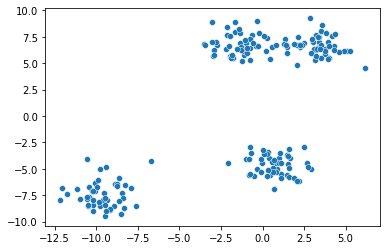

In [8]:
sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1])

<AxesSubplot:>

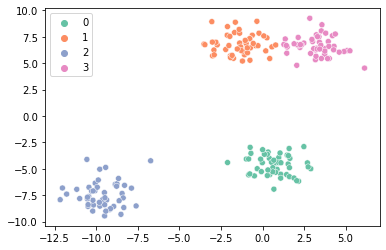

In [9]:
sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1], hue = data[1], palette = 'Set2')

## 2. KMeans Clustering 모델링

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 4)
model.fit(data[0])

KMeans(n_clusters=4)

In [12]:
# 학습된 모델의 클러스터명 확인

model.labels_

array([0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       2, 3, 2, 2, 1, 0, 1, 2, 2, 3, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 3,
       2, 3, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 3, 3, 3, 0, 2, 3, 0, 3,
       1, 0, 3, 0, 3, 1, 3, 0, 3, 0, 2, 3, 3, 0, 3, 2, 0, 0, 2, 3, 1, 2,
       1, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 0, 3, 1, 2, 3, 1, 1, 2, 2, 3, 1,
       1, 2, 3, 1, 3, 2, 1, 3, 0, 0, 0, 3, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 3, 2, 0, 1, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 1, 3, 1, 3, 0, 2, 0,
       0, 2, 1, 1, 3, 1, 3, 3, 3, 1, 0, 3, 0, 2, 2, 1, 3, 1, 3, 1, 2, 1,
       1, 3, 0, 0, 3, 3, 1, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 0, 2, 1, 1, 0,
       3, 2])

In [13]:
data[1]

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

<AxesSubplot:>

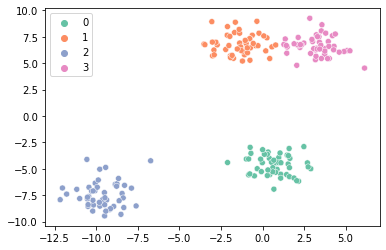

In [14]:
# 실제값

sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1], hue = data[1], palette = 'Set2')

<AxesSubplot:>

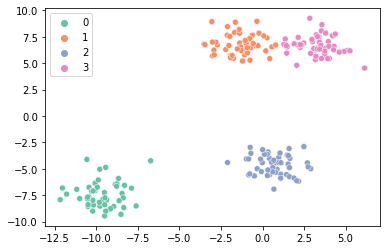

In [15]:
# 모델링 결과

sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_, palette = 'Set2')

- 위 아래 그래프에서 색은 다를 수 있음
- 나눠진 형태를 보면 동일하게 나뉘어짐

### k값 변경

In [16]:
# k = 3

model = KMeans(n_clusters = 3)
model.fit(data[0])

KMeans(n_clusters=3)

<AxesSubplot:>

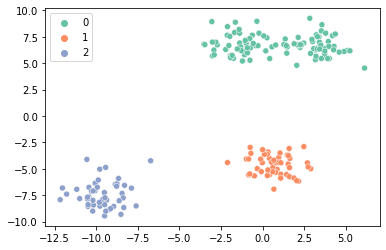

In [17]:
sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_, palette = 'Set2')

<AxesSubplot:>

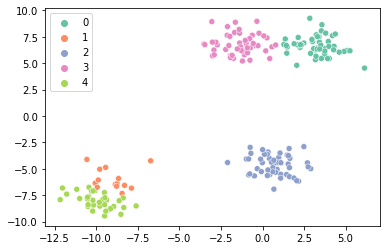

In [18]:
# k = 5

model = KMeans(n_clusters = 5)
model.fit(data[0])
sns.scatterplot(x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_, palette = 'Set2')

In [19]:
model.cluster_centers_     # 각 클러스터의 중심값

array([[ 3.25526355,  6.63529725],
       [-9.00925979, -5.96399219],
       [ 0.72218432, -4.64441009],
       [-1.3849113 ,  6.78514243],
       [-9.89880155, -8.04428767]])

### 최적의 k값 찾기: elbow method

In [20]:
model.inertia_     # 센터와 각각의 샘플과의 거리. 숫자가 클수록 중심과의 거리가 멀다

377.0923630431553

- 센터를 기준으로 observations들이 모여 있는 것이 좋으므로 숫자가 작을수록 좋음

In [21]:
distance = []

for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data[0])
    distance.append(model.inertia_)
    
distance

[3855.390858382052,
 967.5329197924485,
 428.69101432438094,
 381.8704307938783,
 330.40287457725987,
 304.0668276360403,
 266.1744415958364,
 240.6422713616327,
 212.22075225876148]

In [22]:
list(range(2, 11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

<AxesSubplot:>

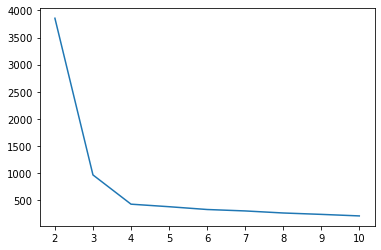

In [24]:
sns.lineplot(x = list(range(2, 11)), y = distance)

- 급격히 꺾이는 부분이 최적의 k값 = 4

# 2. 고객 데이터 활용하여 kmeans clustering

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
# CustomerID를 인덱스로 불러오기

data = pd.read_csv('Mall_Customers.csv', index_col = 0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [29]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [30]:
# 카테고리 칼럼 처리

data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


## kmeans clustering 모델링

In [31]:
from sklearn.cluster import KMeans

In [32]:
model = KMeans(n_clusters = 3)
model.fit(data)

KMeans(n_clusters=3)

In [33]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [34]:
result_df = data.copy()
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [35]:
# label 칼럼에 모델링 결과값인 label 할당

result_df['label'] = model.labels_
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,2
3,20,16,6,0,2
4,23,16,77,0,2
5,31,17,40,0,2
...,...,...,...,...,...
196,35,120,79,0,0
197,45,126,28,0,1
198,32,126,74,1,0


In [36]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,40.394737,87.000000,18.631579,0.526316
2,40.325203,44.154472,49.829268,0.406504


In [37]:
result_df['label'].value_counts()

2    123
0     39
1     38
Name: label, dtype: int64

- kmeans 알고리즘은 초기 센트로이드를 랜덤하게 선택함
- 이 때문에 파이썬 라이브러리 버전에 따라 결과값이 다르게 나옴
- kmeans 알고리즘이 찾은 레이블에는 특별한 의미가 없음

#### elbow method

In [38]:
distance = []

for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)
    
distance

[212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51130.69008126376,
 44355.31351771351,
 40663.673156408804,
 37458.31437773177]

<AxesSubplot:>

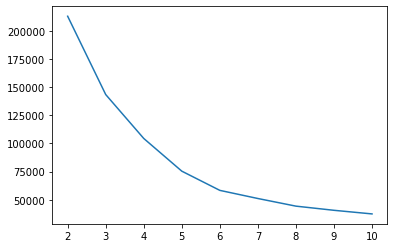

In [39]:
sns.lineplot(x = list(range(2, 11)), y = distance)

- 특별히 눈에 띄는 값이 없으므로 elbow method로는 최적값을 찾기 어려움
- 이럴 때 silhoutte score 사용

#### silhoutte score

- silhoutte score는 값이 클수록 좋음

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(data, model.labels_)

0.38015232860990095

In [42]:
sil = []

for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))
    
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4440669204743008,
 0.45205475380756527,
 0.4400035911705477,
 0.427541566977401,
 0.4108740579475523,
 0.37837719765939687]

<AxesSubplot:>

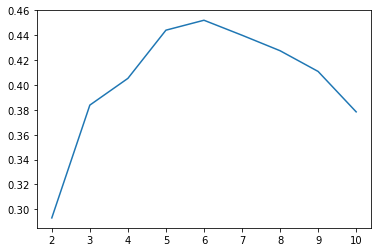

In [43]:
sns.lineplot(x = list(range(2, 11)), y = sil)

- 6이 최적의 k

In [44]:
model = KMeans(n_clusters = 6)
model.fit(data)

KMeans(n_clusters=6)

In [45]:
data['label'] = model.labels_
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,4
2,21,15,81,1,5
3,20,16,6,0,4
4,23,16,77,0,5
5,31,17,40,0,4
...,...,...,...,...,...
196,35,120,79,0,3
197,45,126,28,0,2
198,32,126,74,1,3


In [46]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,56.155556,53.377778,49.088889,0.444444
1,27.000000,56.657895,49.131579,0.342105
2,41.685714,88.228571,17.285714,0.571429
3,32.692308,86.538462,82.128205,0.461538
4,44.142857,25.142857,19.523810,0.380952
5,25.272727,25.727273,79.363636,0.409091


#### box plot으로 각 칼럼 특성 확인

<AxesSubplot:xlabel='label', ylabel='Age'>

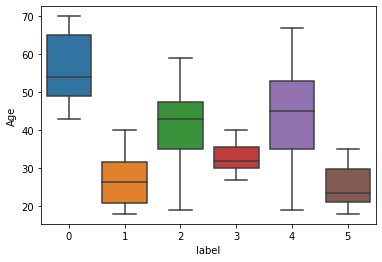

In [47]:
sns.boxplot(x = 'label', y = 'Age', data = data)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

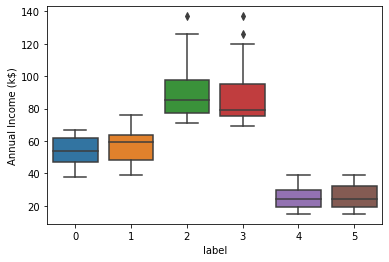

In [48]:
sns.boxplot(x = 'label', y = 'Annual Income (k$)', data = data)

<AxesSubplot:xlabel='label', ylabel='Spending Score (1-100)'>

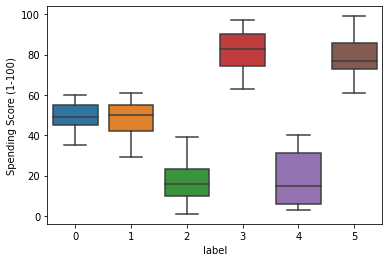

In [49]:
sns.boxplot(x = 'label', y = 'Spending Score (1-100)', data = data)

### PCA(주성분분석, 차원축소)를 활용하여 변수를 줄이고 scatter plot 그리기

In [50]:
# PCA에 label 정보가 들어가면 안되므로, 다시 해당칼럼 제거

data.drop('label', axis = 1, inplace = True)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [51]:
from sklearn.decomposition import PCA

In [52]:
# 몇 개의 변수로 줄일 것인지 파라미터로 설정

pca = PCA(n_components = 2)

In [53]:
pca.fit(data)

PCA(n_components=2)

In [54]:
pca_df = pca.transform(data)

In [55]:
pca_df = pd.DataFrame(pca_df, columns = ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

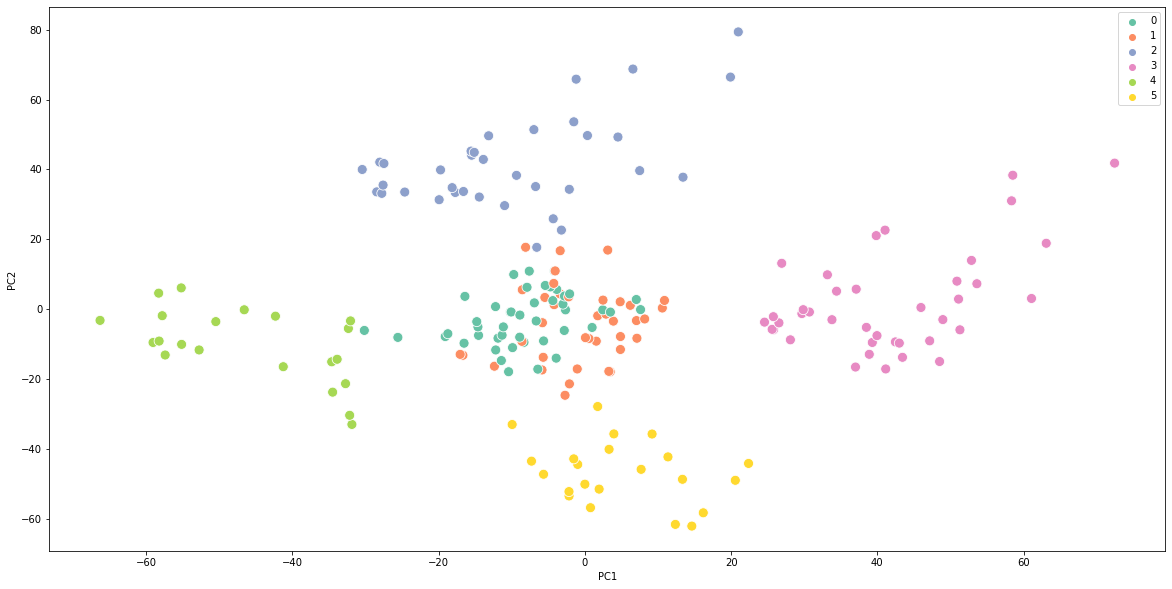

In [56]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = model.labels_, palette = 'Set2', s = 100)